In [1]:
import pandas as pd
import jieba

In [2]:
data = pd.read_csv('./data/4.1/data.csv')

In [3]:
data

,goodsName,shopName,shopAge,shopPlace,shopMiaoshu,shopWuliu,shopFuwu,age,price,monthly_sales,productDescription
0,歌兔雪纺连衣裙夏季长裙修身显瘦小清新 中长款女装露肩高腰裙子,歌兔服饰旗舰店,3,杭州,4.8,4.7,4.7,25-29,69.0,2952,\n廓形: A型\n材质成分: 聚酯纤维100%\n货号: GT16CQZ53\n风格: 通...
1,卡洛莱韩版气质修身露肩收腰a字裙夏季新款女装时尚雪纺连衣裙女,卡洛莱旗舰店,4,杭州,4.8,4.7,4.7,25-29,99.0,2944,\n廓形: A型\n材质成分: 聚酯纤维100%\n销售渠道类型: 纯电商(只在线上销售)\...
2,Krazy清新减龄显瘦32支纯棉撞色polo领海魂条纹学院风弹力连衣裙,krazy服饰旗舰店,6,广州,4.8,4.8,4.8,25-29,131.0,2943,\n廓形: A型\n材质成分: 棉95% 聚氨酯弹性纤维(氨纶)5%\n销售渠道类型: 纯电...
3,连衣裙女夏2016新款潮大码露肩小清新吊带裙印花V领雪纺沙滩裙子,多曼妮旗舰店,0,广州,4.8,4.7,4.7,18-24,69.0,2925,\n廓形: A型\n材质成分: 其他100%\n销售渠道类型: 纯电商(只在线上销售)\n货...
4,韩版显瘦鱼尾裙子2016夏季高腰包臀挂脖露肩荷叶边无袖连衣裙修身,米莱伊旗舰店,3,杭州,4.8,4.8,4.8,25-29,158.0,2924,\n廓形: X型\n材质成分: 聚酯纤维96.9% 聚氨酯弹性纤维(氨纶)3.1%\n销售渠...
...,...,...,...,...,...,...,...,...,...,...,...
5188,betu百图中长款V领条纹无袖连衣裙女修身显瘦背带裙2016秋1607T36,betu旗舰店,7,深圳,4.8,4.8,4.8,25-29,288.0,99,\n材质成分: 粘胶纤维(粘纤)65.7% 聚酯纤维15.9% 聚酰胺纤维(锦纶)14.3%...
5189,念曼2016夏装新款韩国百搭文艺范气质收腰显瘦中长款棉麻连衣裙女,念曼旗舰店,0,杭州,4.8,4.8,4.8,25-29,158.0,99,\n廓形: A型\n材质成分: 粘胶纤维(粘纤)79.5% 亚麻20.5%\n销售渠道类型:...
5190,2016夏季小清新V领修身收腰纯色中长款白色网格镂空a字大摆连衣裙,灵子飞飞旗舰店,3,深圳,4.8,4.8,4.8,25-29,289.0,99,\n材质成分: 聚酯纤维100%\n销售渠道类型: 纯电商(只在线上销售)\n货号: LZ1...
5191,欧美高端大牌2016直筒印花修身妇女品牌中年女装夏装大码连衣裙夏,eychii旗舰店,3,深圳,4.9,4.9,4.9,30-34,288.0,99,\n材质成分: 其他100%\n销售渠道类型: 纯电商(只在线上销售)\n货号: EY16B...


In [4]:
allWords =''
for i in range(len(data)):
    allWords = allWords + ' '+ data['goodsName'][i] + ' '+ data['productDescription'][i]+ ' '

In [5]:
#构建中文分词类v2.0
class Leijieba:    
    
    __stopwords = ''
        
    def __init__(self,s,t='',b=''):    #t为停用词的文件参数（路径+文件名）；b为本地词库的文件参数（路径+文件名）
        self.__s = s
        
        if t != '':
            self.__stopwords = [line.strip() for line in open(t,encoding='UTF-8').readlines()]  #逐行读取停用词文件，放入类内部变量__stopwords
            
        if b != '':
            jieba.load_userdict(b)
        
    def cut(self):
        seg_list = jieba.cut(self.__s, cut_all=False)
        if self.__stopwords != '':
            outstr = []    #目的是存储去掉停用用词的分词结果
            for word in list(seg_list):
                if word not in self.__stopwords:
                    if word.strip() !='':   #去空格
                        outstr.append(word)
                        
            seg_list = outstr                                                
        return list(seg_list)
    
    def num(self):
        lst = self.cut()
        
        word_dict = {}        
        for item in lst:
            if item not in word_dict:
                word_dict[item] = 1   #新建“键-值”
            else:
                word_dict[item] += 1  #增加 键的值
        return sorted(word_dict.items(), key=lambda e:e[1], reverse=True)  

In [6]:
m = Leijieba(allWords,t='./data/4.1/stopwords.txt', b='./data/4.1/user.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lb\AppData\Local\Temp\jieba.cache
Loading model cost 0.585 seconds.
Prefix dict has been built successfully.


In [7]:
wordNum = m.num()[:100]

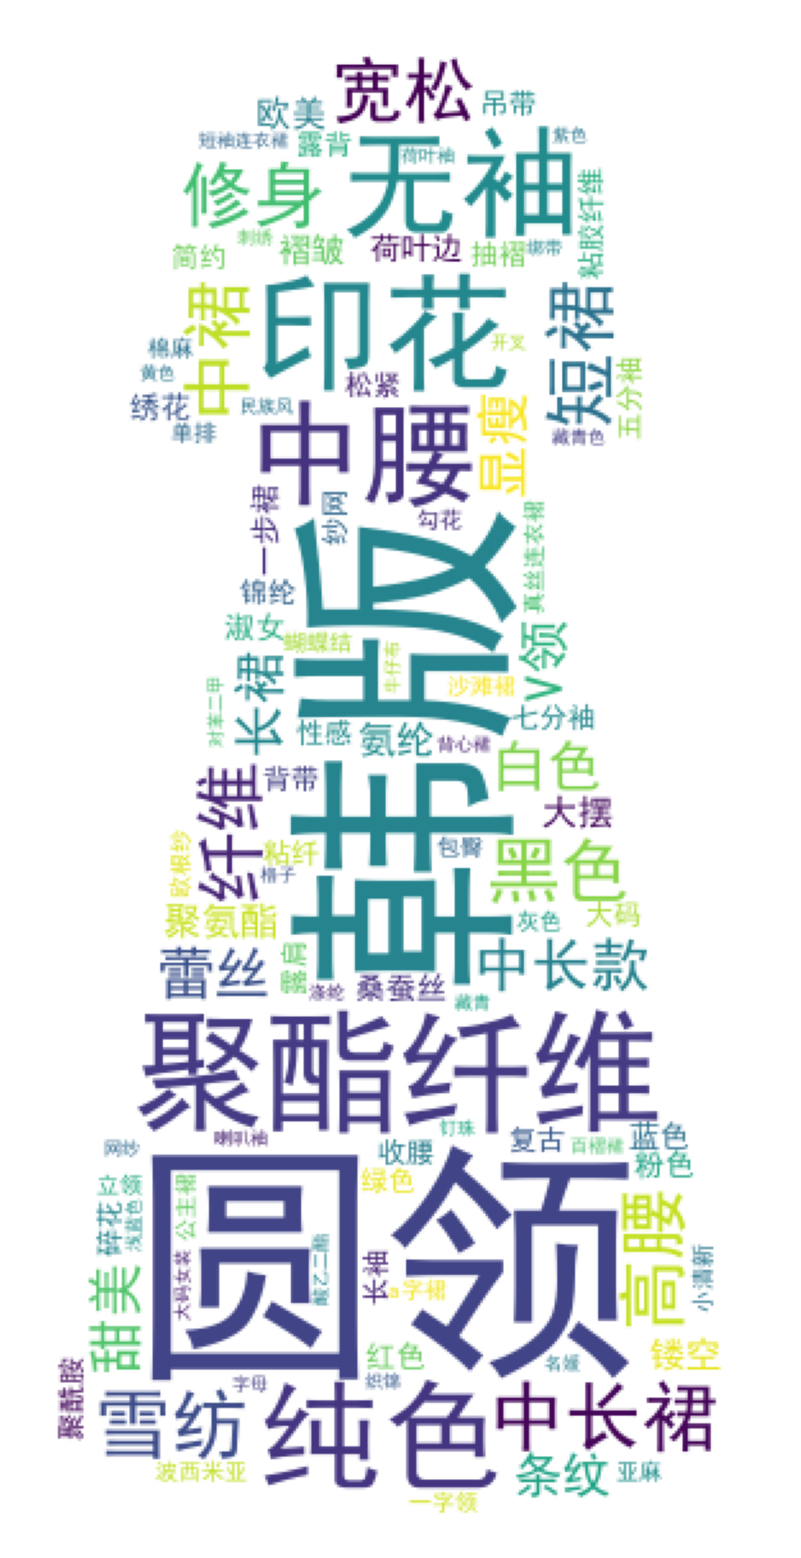

In [8]:
import numpy as np # numpy数据处理库
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

# 词频展示
mask = np.array(Image.open('./data/4.1/wordcloud.png')) # 定义词频背景
wc = wordcloud.WordCloud(
    font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
    background_color="white",
    mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=100 # 字体最大值
)
words = dict(wordNum)
wc.generate_from_frequencies(words) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
plt.rcParams['figure.dpi'] = 400  # 修改dpi
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像

In [10]:
name=['关键词','词频']
wordNum_pd = pd.DataFrame(columns=name,data=wordNum)

In [11]:
wordNum_pd.to_csv('./data/4.1/wordNum.csv',header=True,index=False)